In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

CONCISE = False
TEST_RATIO = 0.10

# Load the dataset
filename = './data/troop_movements.csv'
data = pd.read_csv(filename)
df = pd.DataFrame(data)

# Clean data
df = df[df['unit_type'] != 'unknown']

if CONCISE:
    display(df.head())
else:
    display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2025-07-07 15:44:39,1,resistance_soldier,empire,5,4,2,2,Toydaria
1,2025-07-07 15:44:38,2,stormtrooper,empire,4,4,8,6,Eriadu
2,2025-07-07 15:44:37,3,tie_fighter,empire,6,4,4,7,Skako
5,2025-07-07 15:44:34,6,resistance_soldier,empire,3,7,10,5,Tund
7,2025-07-07 15:44:32,8,stormtrooper,empire,5,5,9,4,Tatooine
...,...,...,...,...,...,...,...,...,...
995,2025-07-07 15:28:04,996,tie_silencer,resistance,1,3,4,9,Zolan
996,2025-07-07 15:28:03,997,tie_silencer,empire,2,3,9,6,Toydaria
997,2025-07-07 15:28:02,998,resistance_soldier,empire,2,2,4,3,Toydaria
998,2025-07-07 15:28:01,999,at-st,resistance,4,1,9,3,Alderaan


In [131]:
count_by_alignment = df.groupby('empire_or_resistance').size().reset_index(name='count')
display(count_by_alignment)

,empire_or_resistance,count
0,empire,418
1,resistance,466


In [132]:
count_by_homeworld = df.groupby('homeworld').size().reset_index(name='count')
if CONCISE:
    display(count_by_homeworld.head())
else:
    display(count_by_homeworld)
    print(np.sum(count_by_homeworld['count']))

,homeworld,count
0,Alderaan,16
1,Aleen Minor,24
2,Bestine IV,16
3,Cerea,14
4,Champala,18
5,Chandrila,21
6,Concord Dawn,22
7,Corellia,21
8,Dagobah,16
9,Dathomir,26


884


In [133]:
count_by_unit_type = df.groupby('unit_type').size().reset_index(name='count')
if CONCISE:
    display(count_by_unit_type.head())
else:
    display(count_by_unit_type)
    print(np.sum(count_by_unit_type['count']))

,unit_type,count
0,at-at,123
1,at-st,141
2,resistance_soldier,127
3,stormtrooper,140
4,tie_fighter,108
5,tie_silencer,125
6,x-wing,120


884


In [134]:
df['is_resistance'] = (df['empire_or_resistance'] == 'resistance')
if CONCISE:
    display(df.head())
else:
    display(df)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2025-07-07 15:44:39,1,resistance_soldier,empire,5,4,2,2,Toydaria,False
1,2025-07-07 15:44:38,2,stormtrooper,empire,4,4,8,6,Eriadu,False
2,2025-07-07 15:44:37,3,tie_fighter,empire,6,4,4,7,Skako,False
5,2025-07-07 15:44:34,6,resistance_soldier,empire,3,7,10,5,Tund,False
7,2025-07-07 15:44:32,8,stormtrooper,empire,5,5,9,4,Tatooine,False
...,...,...,...,...,...,...,...,...,...,...
995,2025-07-07 15:28:04,996,tie_silencer,resistance,1,3,4,9,Zolan,True
996,2025-07-07 15:28:03,997,tie_silencer,empire,2,3,9,6,Toydaria,False
997,2025-07-07 15:28:02,998,resistance_soldier,empire,2,2,4,3,Toydaria,False
998,2025-07-07 15:28:01,999,at-st,resistance,4,1,9,3,Alderaan,True


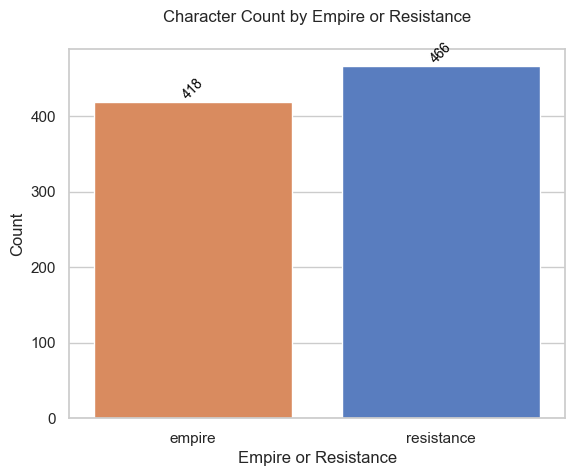

In [135]:
sns.set_theme(style="whitegrid")
sns_palette = sns.color_palette('muted')

ax =  sns.barplot(x="empire_or_resistance", y="count", palette=[sns_palette[1], sns_palette[0]],
                  hue="empire_or_resistance", data=count_by_alignment)
plt.title("Character Count by Empire or Resistance", y=1.05)
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                rotation=45,
                xytext=(0, 10), textcoords='offset points')
plt.show()

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y)
X = df[['unit_type', 'homeworld']]
X_enc = pd.get_dummies(X)
y = df['empire_or_resistance']

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=TEST_RATIO, random_state=42)

# Train the classifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Predict alignment for test set
y_pred = clf.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7078651685393258
